# This notebook shows K Nearest Neighbors method to predict result, given the data which are not explained in detail.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### The data is from udemy 'python for data science and machine learning bootcamp' course.

In [6]:
data = pd.read_csv('KNN_Project_Data')

In [7]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


##### Before applying K Nearest Neighbors method, it is important to normalize or standardize the dataset first, as each column of the dataframe is filled with data that has different data range with other column.

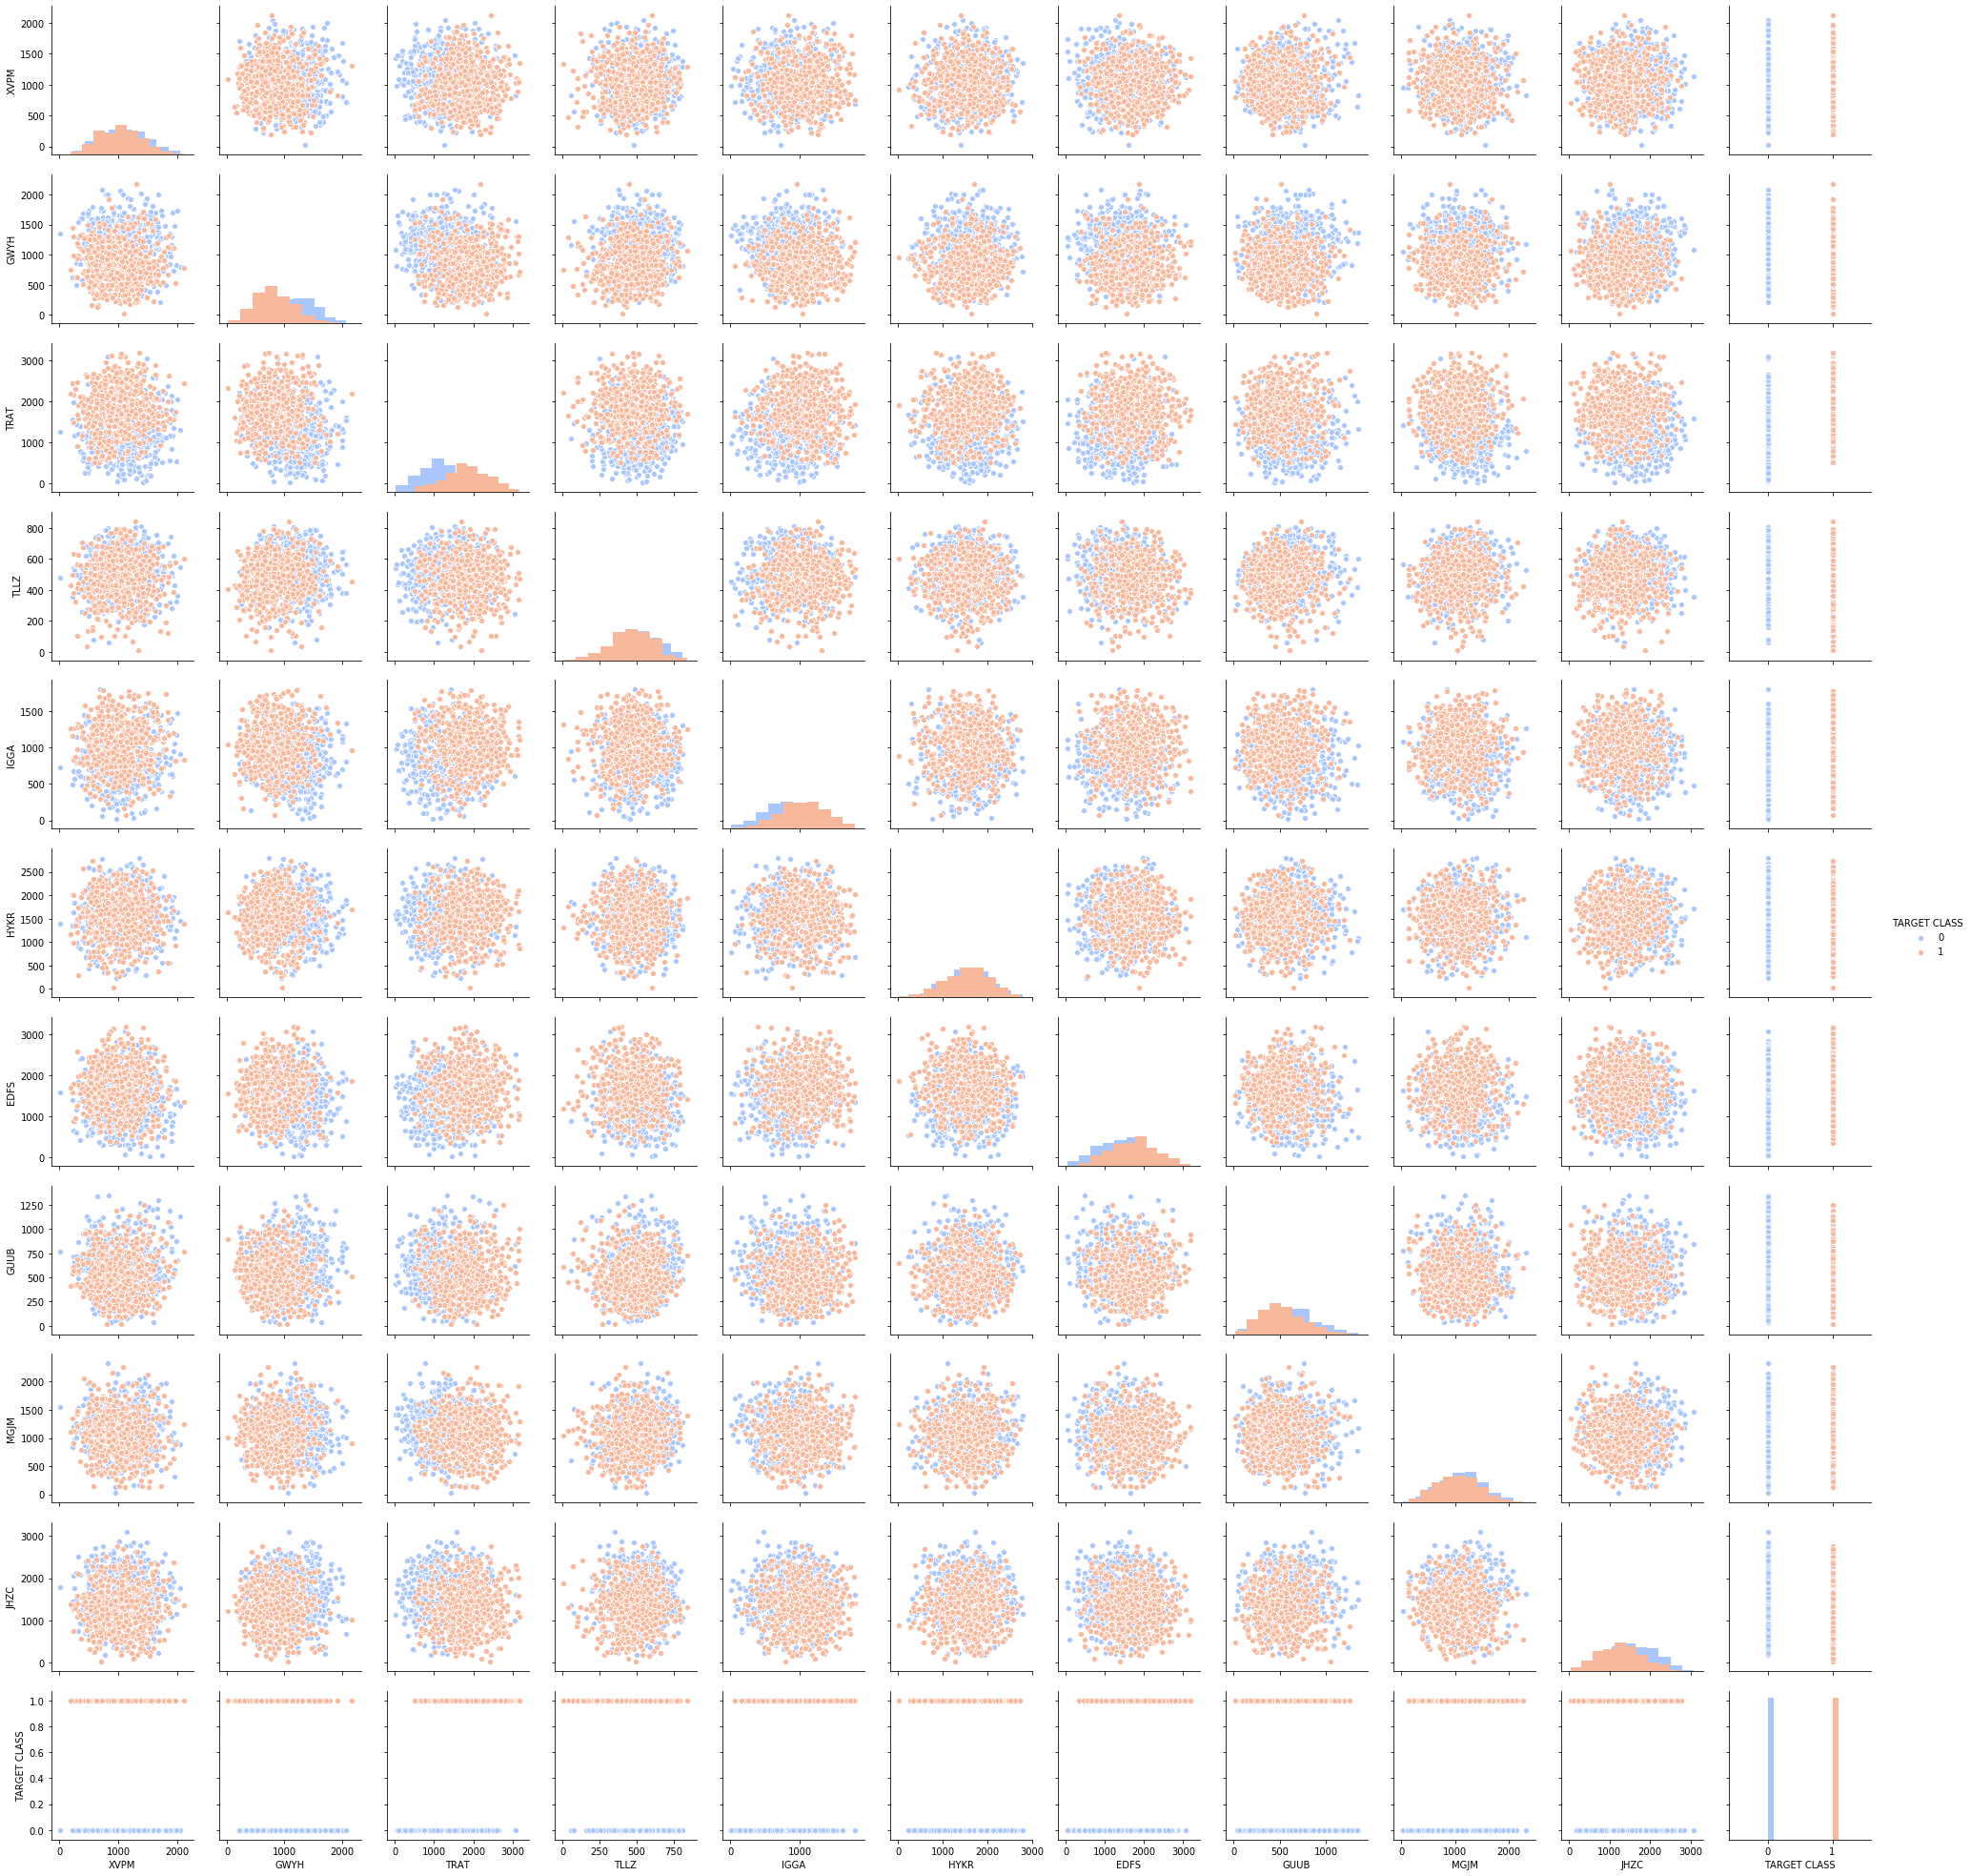

In [4]:
sns.pairplot(data, diag_kind='hist', hue='TARGET CLASS', palette='coolwarm')

##### It is better to split the data into train and test data, and later apply feature scaling of the train and test data.

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
X = data.drop('TARGET CLASS', axis=1)
y = data['TARGET CLASS']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

##### Standardize the data using StandardScaler method from sklearn.preprocessing library.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X_train = scaler.transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

##### Setting the K number for the K Nearest Neighbors method is just not as simple as picking a random number. So, elbow method is used to see which K number has best result (minimum error).

In [22]:
from sklearn.neighbors import KNeighborsClassifier

##### Using for loop to append error rate for each K number from 1 to 40, into the error_rate list. So later a plot can be made to show error trend as different K numbers are being tried.

In [30]:
error_rate = []

for i in range(1,100):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    predict_i = knn_i.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error rate')

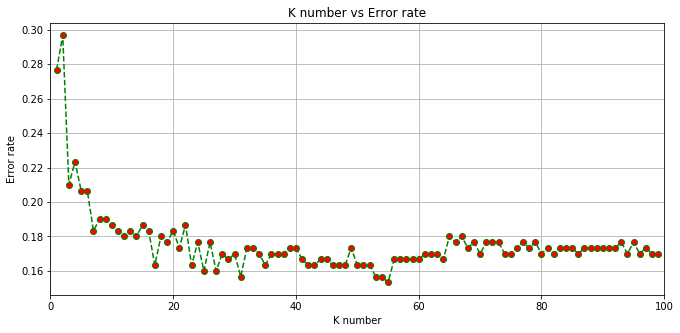

In [31]:
plt.figure(figsize=(11,5))
plt.plot(range(1,100), error_rate, ls = 'dashed', color='green', marker = 'o', markerfacecolor='red')
plt.gca().grid()
plt.gca().set_xlim(0, 100)
plt.title('K number vs Error rate')
plt.xlabel('K number')
plt.ylabel('Error rate')

##### It seems the error_rate will be between 0.16 and 0.2 for different K number after K around 30. So it is better to try using K = 40 as it has the result of minimum error along the plot.

##### Now train and predict using K = 40.

In [53]:
knn = KNeighborsClassifier(n_neighbors=40)

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [55]:
predict = knn.predict(X_test)

##### Using confusion matrix and classification report to show how well the model was used for prediction.

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
print(confusion_matrix(y_test, predict))

[[124  28]
 [ 24 124]]


##### The model was quite good as the f1-score reaches 0.84. And from the cell above, it shows that the number of correct prediction is way higher than false prediction number.

In [58]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



(end of notebook).